In [18]:
## importing necessary dependencies 
## Note - Some dependencies may be redundant and not really required in this notebook. 
import obspy 
from obspy.geodetics.base import gps2dist_azimuth
from obspy.taup import TauPyModel


import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm import tqdm
import os
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters
import time


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from time import time
import matplotlib

model = TauPyModel(model="iasp91")

In [12]:
iq_lats = pd.read_csv('icequakes_catalog.csv')['latitude']
iq_lons = pd.read_csv('icequakes_catalog.csv')['longitude']

eq_lats = pd.read_csv('earthquakes_catalog.csv')['latitude']
eq_lons = pd.read_csv('earthquakes_catalog.csv')['longitude']

stns = pd.read_csv('gmap-stations.txt', sep='|', skiprows=[2,6])


stations = stns.values[:,1].astype('str')
stn_lats = stns.values[:,2].astype('float')
stn_lons = stns.values[:,3].astype('float')
gl_lat, gl_lon = 61.219722, -146.895278

no_of_icequakes = []
no_of_earthquakes = []
for i in range(15):
    no_of_icequakes.append(len(glob('Data/icequake_waveforms/*'+stations[i]+'*')))
    no_of_earthquakes.append(len(glob('Data/earthquake_waveforms/*'+stations[i]+'*')))
    
    
total_events = np.array(no_of_icequakes)+np.array(no_of_earthquakes)
order = np.argsort(total_events)

In [13]:
def forest_test(X, Y, n_estimators= 100):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.20, 
                                                        random_state = 101)
    #X_train_fs, X_test_fs, fs = select_features(X_Train, Y_Train, X_Test)
    
    trainedforest = RandomForestClassifier(n_estimators=n_estimators).fit(X_Train,Y_Train)
    
    predictionforest = trainedforest.predict(X_Test)
    #print(confusion_matrix(Y_Test,predictionforest))
    #print(classification_report(Y_Test,predictionforest))
    
    tn, fp, fn, tp = confusion_matrix(Y_Test, predictionforest).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    acc = accuracy_score(Y_Test, predictionforest)
    
    return acc, sensitivity, specificity

In [16]:
acc_15s = []
acc_30s = []
acc_45s = []
acc_1min = []
acc_2min = []

spec_15s = []
spec_30s = []
spec_45s = []
spec_1min = []
spec_2min = []

sens_15s = []
sens_30s = []
sens_45s = []
sens_1min = []
sens_2min = []


for i in tqdm(range(len(stations))):
      X = np.loadtxt('tsfel_features/all/15s/'+stations[i]+'.txt')
      y = np.loadtxt('tsfel_features/all/15s/'+stations[i]+'_labels.txt')
      r = forest_test(X, y)
      acc_15s.append(r[0])
      sens_15s.append(r[1])
      spec_15s.append(r[2])
              
      X = np.loadtxt('tsfel_features/all/30s/'+stations[i]+'.txt')
      y = np.loadtxt('tsfel_features/all/30s/'+stations[i]+'_labels.txt')
      r = forest_test(X, y)
      acc_30s.append(r[0])
      sens_30s.append(r[1])
      spec_30s.append(r[2])
              
      X = np.loadtxt('tsfel_features/all/45s/'+stations[i]+'.txt')
      y = np.loadtxt('tsfel_features/all/45s/'+stations[i]+'_labels.txt')
      r = forest_test(X, y)
      acc_45s.append(r[0])
      sens_45s.append(r[1])
      spec_45s.append(r[2])
              
      X = np.loadtxt('tsfel_features/all/1min/'+stations[i]+'.txt')
      y = np.loadtxt('tsfel_features/all/1min/'+stations[i]+'_labels.txt')
      r = forest_test(X, y)
      acc_1min.append(r[0])
      sens_1min.append(r[1])
      spec_1min.append(r[2])
              
      X = np.loadtxt('tsfel_features/all/15s/'+stations[i]+'.txt')
      y = np.loadtxt('tsfel_features/all/15s/'+stations[i]+'_labels.txt')
      r = forest_test(X, y)
      acc_2min.append(r[0])
      sens_2min.append(r[1])
      spec_2min.append(r[2])
              

100%|██████████| 15/15 [02:22<00:00,  9.51s/it]


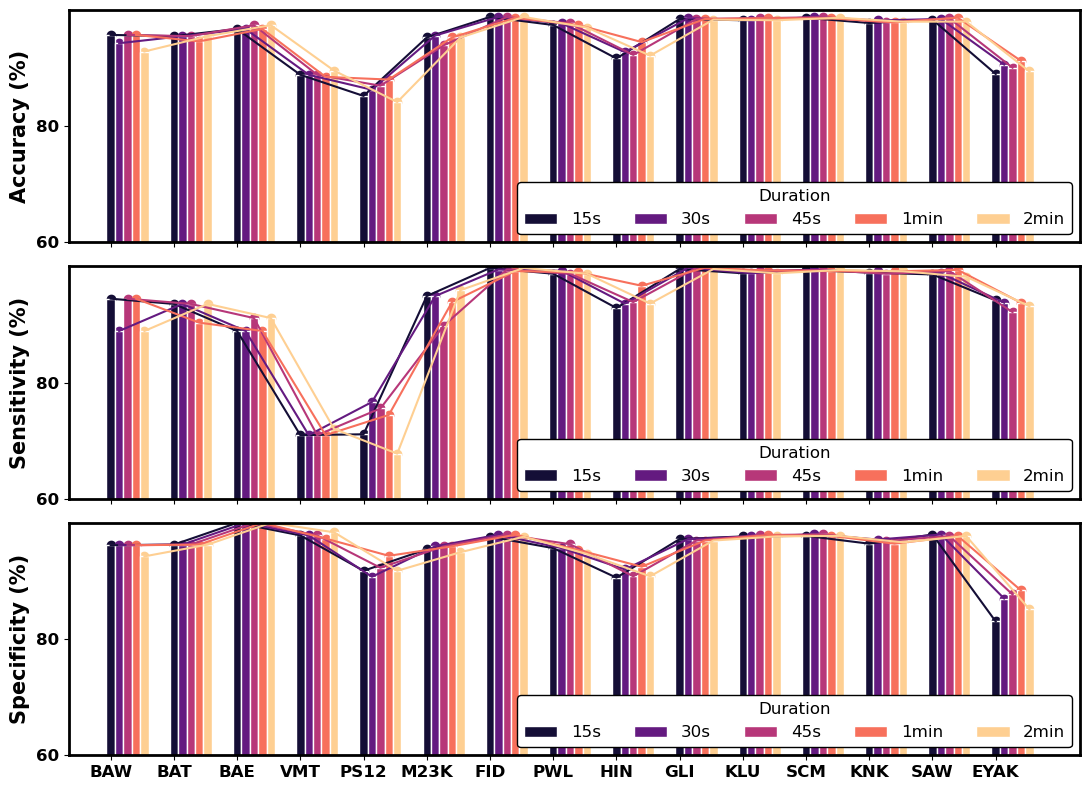

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(11,8), sharex='col', gridspec_kw=
                                                   {'height_ratios':[2,2,2]})




## Extracting colors from a colormap to maintain a constant color scheme
cmap = matplotlib.cm.get_cmap('magma')
c1 = cmap(0.1)
c2 = cmap(0.3)
c3 = cmap(0.5)
c4 = cmap(0.7)
c5 = cmap(0.9)
c6 = cmap(1.0)
# set width of bar
barWidth = 0.2
# Set position of bar on X axis
br1 = 1.5*np.arange(len(stations))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]



ratio = np.array(no_of_icequakes)/np.array(no_of_earthquakes)

#################                
# Setting up the first axes
##############
ax.set_xlim(0,15)
ax_t = ax.twinx()
ax_t.plot(br1, ratio[order], color = c3, linewidth = 4)
ax_t.set_yticks(np.linspace(0.4,1.4,5))
ax_t.set_yticklabels([str(i) for i in np.linspace(0.4,1.4,5)],fontsize=10, fontweight='bold')
ax_t.set_ylabel('Icequakes/Earthquakes', fontsize=10, fontweight='bold', color=c3)

ax.bar(br1, np.array(no_of_icequakes)[order], color =c1, width = 0.4,
     label ='Icequakes',edgecolor='w')
ax.bar(br3, np.array(no_of_earthquakes)[order], color =c5, width = 0.4,
     label ='Earthquakes',edgecolor='w')

#ax.bar(np.arange(15)+0.5, total_events[order], width=0.6)
ax.set_yticks(np.linspace(0,3000,6))
ax.set_yticklabels([str(int(i)) for i in np.linspace(0,3000,6)],fontsize=12, fontweight='bold')
ax.set_ylabel('No. of Events', fontsize=15, fontweight='bold')
ax.legend(loc='upper left',ncol=1, facecolor='white', framealpha=1, edgecolor='black', fontsize=12)


#########
# Setting up second axes
########


a1 = np.array(acc_15s)*100
a2 = np.array(acc_30s)*100
a3 = np.array(acc_45s)*100
a4 = np.array(acc_1min)*100
a5 = np.array(acc_2min)*100



plt.style.use('default')
plt.rcParams['axes.linewidth'] = 2


# Make the plot
ax1.bar(br1, a1[order], color =c1, width = barWidth,
     label ='15s',edgecolor='w')
ax1.bar(br2, a2[order], color =c2, width = barWidth,
         label ='30s',edgecolor='w')
ax1.bar(br3, a3[order], color =c3, width = barWidth,
         label ='45s',edgecolor='w')
ax1.bar(br4, a4[order], color =c4, width = barWidth,
         label ='1min',edgecolor='w')
ax1.bar(br5, a5[order], color =c5, width = barWidth,
         label ='2min',edgecolor='w')

#for i in range(15):
#    plt.scatter(X[int(np.argmax(v[:,i]))][i], max(v[:,i])+0.5, c=c[int(np.argmax(v[:,i]))])


ax1.scatter(br1, a1[order], color=c1)
ax1.scatter(br2, a2[order], color=c2) 
ax1.scatter(br3, a3[order], color=c3) 
ax1.scatter(br4, a4[order], color=c4) 
ax1.scatter(br5, a5[order], color=c5) 

ax1.plot(br1, a1[order], color=c1)
ax1.plot(br2, a2[order], color=c2) 
ax1.plot(br3, a3[order], color=c3)
ax1.plot(br4, a4[order], color=c4)
ax1.plot(br5, a5[order], color=c5)

# Adding Xticks
#ax1.set_title('Accuracy', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('Accuracy (%)', fontweight ='bold', fontsize = 15)
ax1.set_yticks(ticks = np.arange(0,100,20))
ax1.set_yticklabels(labels = [str(i) for i in np.arange(0,100,20)], fontsize=12, fontweight='bold')
ax1.set_ylim(60,100)
ax1.set_xlim(-1,23)
ax1.legend(loc='lower right',ncol=5, facecolor='white', framealpha=1, edgecolor='black', fontsize=12, title ='Duration', title_fontsize=12)




###############
# Setting up third axes
##############

a1 = np.array(sens_15s)*100
a2 = np.array(sens_30s)*100
a3 = np.array(sens_45s)*100
a4 = np.array(sens_1min)*100
a5 = np.array(sens_2min)*100



plt.style.use('default')
plt.rcParams['axes.linewidth'] = 2


# Make the plot
ax2.bar(br1, a1[order], color =c1, width = barWidth,
     label ='15s',edgecolor='w')
ax2.bar(br2, a2[order], color =c2, width = barWidth,
         label ='30s',edgecolor='w')
ax2.bar(br3, a3[order], color =c3, width = barWidth,
         label ='45s',edgecolor='w')
ax2.bar(br4, a4[order], color =c4, width = barWidth,
         label ='1min',edgecolor='w')
ax2.bar(br5, a5[order], color =c5, width = barWidth,
         label ='2min',edgecolor='w')

#for i in range(15):
#    plt.scatter(X[int(np.argmax(v[:,i]))][i], max(v[:,i])+0.5, c=c[int(np.argmax(v[:,i]))])


ax2.scatter(br1, a1[order], color=c1)
ax2.scatter(br2, a2[order], color=c2) 
ax2.scatter(br3, a3[order], color=c3) 
ax2.scatter(br4, a4[order], color=c4) 
ax2.scatter(br5, a5[order], color=c5) 

ax2.plot(br1, a1[order], color=c1)
ax2.plot(br2, a2[order], color=c2) 
ax2.plot(br3, a3[order], color=c3)
ax2.plot(br4, a4[order], color=c4)
ax2.plot(br5, a5[order], color=c5)

# Adding Xticks
#ax2.set_title('Sensitivity', fontweight ='bold', fontsize = 15)
ax2.set_ylabel('Sensitivity (%)', fontweight ='bold', fontsize = 15)
ax2.set_yticks(ticks = np.arange(0,100,20))
ax2.set_yticklabels(labels = [str(i) for i in np.arange(0,100,20)], fontsize=12, fontweight='bold')
ax2.set_ylim(60,100)
ax2.set_xlim(-1,23)
ax2.legend(loc='lower right',ncol=5, facecolor='white', framealpha=1, edgecolor='black', fontsize=12, title ='Duration', title_fontsize=12)



###############
# Setting up fourth axes
##############

a1 = np.array(spec_15s)*100
a2 = np.array(spec_30s)*100
a3 = np.array(spec_45s)*100
a4 = np.array(spec_1min)*100
a5 = np.array(spec_2min)*100



plt.style.use('default')
plt.rcParams['axes.linewidth'] = 2


# Make the plot
ax3.bar(br1, a1[order], color =c1, width = barWidth,
     label ='15s',edgecolor='w')
ax3.bar(br2, a2[order], color =c2, width = barWidth,
         label ='30s',edgecolor='w')
ax3.bar(br3, a3[order], color =c3, width = barWidth,
         label ='45s',edgecolor='w')
ax3.bar(br4, a4[order], color =c4, width = barWidth,
         label ='1min',edgecolor='w')
ax3.bar(br5, a5[order], color =c5, width = barWidth,
         label ='2min',edgecolor='w')

#for i in range(15):
#    plt.scatter(X[int(np.argmax(v[:,i]))][i], max(v[:,i])+0.5, c=c[int(np.argmax(v[:,i]))])


ax3.scatter(br1, a1[order], color=c1)
ax3.scatter(br2, a2[order], color=c2) 
ax3.scatter(br3, a3[order], color=c3) 
ax3.scatter(br4, a4[order], color=c4) 
ax3.scatter(br5, a5[order], color=c5) 

ax3.plot(br1, a1[order], color=c1)
ax3.plot(br2, a2[order], color=c2) 
ax3.plot(br3, a3[order], color=c3)
ax3.plot(br4, a4[order], color=c4)
ax3.plot(br5, a5[order], color=c5)

# Adding Xticks
#ax3.set_title('Specificity', fontweight ='bold', fontsize = 15)
ax3.set_ylabel('Specificity (%)', fontweight ='bold', fontsize = 15)
ax3.set_yticks(ticks = np.arange(0,100,20))
ax3.set_yticklabels(labels = [str(i) for i in np.arange(0,100,20)], fontsize=12, fontweight='bold')
ax3.set_ylim(60,100)
ax3.set_xlim(-1,23)
ax3.legend(loc='lower right',ncol=5, facecolor='white', framealpha=1, edgecolor='black', fontsize=12, title ='Duration', title_fontsize=12)
ax3.set_xticks(br1)
ax3.set_xticklabels(stations[order], fontsize=12, fontweight='bold')



fig.tight_layout()
